In [46]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [47]:
#plt.style.use('seaborn')
plt.rc('legend', fontsize=20) # using a size in points
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

In [174]:
def plot_radar(r, ax=None, fill=True, figsize=(6,6), **kwargs):
    """plot a radar 
    Inputs: r, list like"""
    
    if ax==None:
        fig, ax = plt.subplots(1,1,figsize=figsize, subplot_kw={'projection': 'polar'} )
    
    r = list(r)
    N = len(r)
    r.append( r[0] )  # repeat first to close circle

    # get angle for each value
    theta = [(n * 2 * np.pi +1 )/ N  for n in range(N) ]
    theta.append( theta[0] )
    
    ax.plot(theta, r, **kwargs)
    if fill:
        ax.fill(theta, r, alpha=0.1)
    ax.set_xticks(theta[:-1], );
    #ax.set_xticklabels( ['v1', 'v2'] );
    ax.spines['polar'].set_visible(False)  # 不显示极坐标最外圈的圆
    return ax
    


In [49]:
def show_opsims(dbDir):
    '''Show available opsim databases in the provided directory.

    Args:
        dbDir(str): The path the database directory.
    '''

    dbDir = os.path.abspath(dbDir)
    db_list = glob.glob(dbDir+'/*.db')
    runNames = [os.path.splitext(os.path.basename(x))[0] for x in db_list]

    return runNames


In [50]:
def scale(arr, mode=0):
    """scale array by max or 0-1"""
    newarr = arr / arr.max()
    if mode==1:
        newarr = (arr - arr.min()) / (arr.max()-arr.min())
        
    return newarr

def get_family(df):
    """get family of opsim"""
    
    return df['db'].split('_')[0]



In [51]:
# name of opsims
dbpath = "/home/idies/workspace/lsst_cadence/FBS_1.5/"  # path to all opsim databases


# v1.5  86
# v1.6  30 
# v1.7 74

runNames = show_opsims(dbpath)

runNames.sort()

In [53]:
# prepare proper motion dataframe from scores

#df_score_CI = pd.read_csv('./data/Score_CI.csv', skiprows=1, names=['score_CI'])
#df_score_LS = pd.read_csv('./data/Score_LS.csv', skiprows=1, names=['score_LS'])
#df_score_PMT = pd.read_csv('./data/Score_PMT.csv', skiprows=1, names=['score_PMT'])

df_score_CI = pd.read_csv('./data/Score_CI.csv', index_col=0)
'''
df_score_LS = pd.read_csv('./data/Score_LS.csv', index_col=0)
df_score_PMT = pd.read_csv('./data/Score_PMT.csv', index_col=0)


df_properMotion = pd.DataFrame()

#df_properMotion['db'] = runNames
df_properMotion['db'] = df_score_CI.db
df_properMotion['FoM_CI'] = df_score_CI.fom
df_properMotion['FoM_LS'] = df_score_LS.fom
df_properMotion['FoM_PMT'] = df_score_PMT.fom

df_properMotion.sort_values(by='db', inplace=True)
df_properMotion.to_csv('./data/df_properMotion.csv', index=False)

'''

"\ndf_properMotion = pd.DataFrame()\n\n#df_properMotion['db'] = runNames\ndf_properMotion['db'] = df_score_CI.db\ndf_properMotion['FoM_CI'] = df_score_CI.fom\ndf_properMotion['FoM_LS'] = df_score_LS.fom\ndf_properMotion['FoM_PMT'] = df_score_PMT.fom\n\ndf_properMotion.sort_values(by='db', inplace=True)\ndf_properMotion.to_csv('./data/df_properMotion.csv', index=False)\n\n"

In [195]:
filters = ['u', 'g', 'r', 'i', 'z', 'y']
cols_all = ['uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy', 'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy']

cols_same = [ 'uu',  'gg',  'rr',  'ii',  'zz',  'yy']

cols_diff = ['ug', 'ur', 'ui', 'uz', 'uy', 'gr', 'gi', 'gz', 'gy', 'ri', 'rz', 'ry', 'iz', 'iy', 'zy']

cols_pm = ['FoM_CI', 'FoM_LS', 'FoM_PMT']

In [100]:
df_score_CI = pd.read_csv('./data/Score_CI.csv', index_col=0)
'''
df_score_LS = pd.read_csv('./data/Score_LS.csv', index_col=0)
df_score_PMT = pd.read_csv('./data/Score_PMT.csv', index_col=0)
'''

df_names =  pd.DataFrame()

#df_properMotion['db'] = runNames
df_names['db'] = df_score_CI.db

df_names.sort_values(by='db', inplace=True)
df_names.to_csv('./data/df_dbnames.csv', index=False)


In [56]:
df_tgaps = pd.read_csv('./data/df_tgapsFoM_WFD_v1.5.csv')
df_nfields = pd.read_csv('./data/df_Nfields_WFD_v1.5.csv')
df_nstar = pd.read_csv('./data/df_Nstars_WFD_v1.5.csv')
df_depth = pd.read_csv('./data/depthFoM_mag_v1.5.csv')
df_depth = df_depth[ df_depth['db']!='baseline_samefilt_v1.5_10yrs.db'].copy()  # remove the missed one 
df_depth.reset_index(drop=True, inplace=True)
#df_properMotion = pd.read_csv('./data/df_properMotion.csv')


In [102]:
df_tgaps

,uu,ug,ur,ui,uz,uy,gg,gr,gi,gz,...,rz,ry,ii,iz,iy,zz,zy,yy,db,total
0,0.115324,0.247561,0.552855,0.558201,NaN,0.013252,0.166598,0.560783,0.512097,0.429243,...,0.332131,0.111697,0.034394,0.529173,0.459638,0.034776,0.541333,0.136425,agnddf_v1.5_10yrs.db,0.443376
1,0.132108,0.302504,0.596737,0.641819,NaN,0.002467,0.202278,0.625466,0.789906,0.812652,...,0.559549,0.278464,0.033135,0.637565,0.767807,0.030810,0.702359,0.092177,alt_dust_v1.5_10yrs.db,0.603965
2,0.138589,0.365459,0.626793,0.640030,NaN,0.003302,0.209477,0.673460,0.862348,0.766844,...,0.767490,0.437692,0.036390,0.703683,0.882131,0.035766,0.775614,0.099928,alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db,0.679559
3,0.131843,0.217546,0.459239,0.435807,NaN,0.000726,0.187653,0.524360,0.472116,0.388292,...,0.314829,0.140882,0.031415,0.519336,0.509556,0.031539,0.549658,0.117800,baseline_2snaps_v1.5_10yrs.db,0.409759
4,0.262402,0.026454,0.048121,0.082887,NaN,0.371274,0.256637,0.060848,0.139677,0.390226,...,0.112077,0.147623,0.027954,0.069658,0.078167,0.033584,0.091011,0.192188,baseline_samefilt_v1.5_10yrs.db,0.212943
5,0.119471,0.257080,0.543489,0.544754,NaN,0.000224,0.218491,0.589370,0.547260,0.410032,...,0.391950,0.180119,0.027948,0.559649,0.619545,0.026855,0.607155,0.131375,baseline_v1.5_10yrs.db,0.477122
6,0.095540,0.202355,0.408251,0.358009,NaN,0.000047,0.179576,0.443266,0.392252,0.322318,...,0.275644,0.110807,0.022301,0.431723,0.447797,0.021508,0.467932,0.135508,bulges_bs_v1.5_10yrs.db,0.354524
7,0.120674,0.194240,0.417779,0.371981,NaN,0.000138,0.172566,0.432168,0.384750,0.301723,...,0.268119,0.101078,0.021886,0.428430,0.454710,0.021203,0.462897,0.134293,bulges_bulge_wfd_v1.5_10yrs.db,0.351065
8,0.122939,0.201539,0.406100,0.381288,NaN,0.021931,0.181104,0.442089,0.398450,0.273422,...,0.294559,0.116662,0.021424,0.433417,0.443332,0.021674,0.457631,0.137519,bulges_cadence_bs_v1.5_10yrs.db,0.365787
9,0.118926,0.200685,0.392965,0.376150,NaN,0.004965,0.185447,0.431172,0.391983,0.224042,...,0.299334,0.101730,0.021744,0.427044,0.439678,0.020748,0.458388,0.137448,bulges_cadence_bulge_wfd_v1.5_10yrs.db,0.351019


In [103]:
# normalize
for col in cols_all:
    # df_new[ col ] = np.tanh ( scale ( df_fom[col] ) * 3 )
    df_tgaps[col] = scale(df_tgaps[col])
    df_nfields[col] = scale(df_nfields[col])
    df_nstar[col] = scale(df_nstar[col])

for col in filters:
    df_depth[col] = scale(df_depth[col], mode=1)

'''
for col in ['FoM_CI', 'FoM_LS', 'FoM_PMT']:
    df_properMotion[col] = scale(df_properMotion[col], mode=1)
'''

df_tgapsCol = df_tgaps.copy()
df_tgapsCol['total'] = scale( np.sum(df_tgaps[ cols_diff ], axis=1) )
df_tgapsEvol = df_tgaps.copy()
df_tgapsEvol['total'] = scale( np.sum(df_tgaps[ cols_same ], axis=1) )
df_nfields['total'] = scale( np.sum(df_nfields[ cols_all ], axis=1) )
df_nstar['total'] = scale( np.sum(df_nstar[ cols_all ], axis=1) )
df_depth['total'] = scale( np.sum(df_depth[ filters ], axis=1) )

#df_properMotion['total'] = scale( np.sum(df_properMotion[ cols_pm ], axis=1) )


In [104]:
df_radar = df_names.copy()

df_radar['FoM_tgapsCol'] = df_tgapsCol['total'] 
df_radar['FoM_tgapsEvol'] = df_tgapsEvol['total'] 
df_radar['FoM_EG'] = df_nfields['total']
df_radar['FoM_Gal'] = df_nstar['total']
df_radar['FoM_depth'] = df_depth['total']
df_radar.to_csv('./data/df_radar.csv', index=False)

In [105]:
#df_radar = pd.read_csv('./data/df_radar.csv')

In [106]:
df_radar.head()

,db,FoM_tgapsCol,FoM_tgapsEvol,FoM_EG,FoM_Gal,FoM_depth
46,agnddf_v1.5_10yrs,0.501525,0.161946,0.381081,0.238933,0.810938
48,alt_dust_v1.5_10yrs,0.592161,0.149794,0.645743,0.666538,0.752418
8,alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs,0.408157,0.130511,0.256095,0.247904,0.924992
28,baseline_2snaps_v1.5_10yrs,0.520153,0.158754,0.552627,0.634159,0.804692
49,baseline_v1.5_10yrs,0.692436,0.204098,0.747593,0.746161,0.762187


In [107]:
df_radar.db[:40]

46                         agnddf_v1.5_10yrs
48                       alt_dust_v1.5_10yrs
8     alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs
28                baseline_2snaps_v1.5_10yrs
49                       baseline_v1.5_10yrs
53                      bulges_bs_v1.5_10yrs
68               bulges_bulge_wfd_v1.5_10yrs
80              bulges_cadence_bs_v1.5_10yrs
21       bulges_cadence_bulge_wfd_v1.5_10yrs
62         bulges_cadence_i_heavy_v1.5_10yrs
38                 bulges_i_heavy_v1.5_10yrs
7                       daily_ddf_v1.5_10yrs
33                   dcr_nham1_ug_v1.5_10yrs
74                  dcr_nham1_ugr_v1.5_10yrs
0                  dcr_nham1_ugri_v1.5_10yrs
40                   dcr_nham2_ug_v1.5_10yrs
17                  dcr_nham2_ugr_v1.5_10yrs
58                 dcr_nham2_ugri_v1.5_10yrs
52                        descddf_v1.5_10yrs
10               filterdist_indx1_v1.5_10yrs
54               filterdist_indx2_v1.5_10yrs
41               filterdist_indx3_v1.5_10yrs
5         

In [108]:
df_radar.db[40:]

69               goodseeing_gri_v1.5_10yrs
19              goodseeing_griz_v1.5_10yrs
9                 goodseeing_gz_v1.5_10yrs
42                 goodseeing_i_v1.5_10yrs
31             greedy_footprint_v1.5_10yrs
84      roll_mod2_dust_sdf_0.20_v1.5_10yrs
34        rolling_mod2_sdf_0.10_v1.5_10yrs
77        rolling_mod2_sdf_0.20_v1.5_10yrs
36        rolling_mod3_sdf_0.10_v1.5_10yrs
70        rolling_mod3_sdf_0.20_v1.5_10yrs
64        rolling_mod6_sdf_0.10_v1.5_10yrs
1         rolling_mod6_sdf_0.20_v1.5_10yrs
71          short_exp_2ns_1expt_v1.5_10yrs
43          short_exp_2ns_5expt_v1.5_10yrs
55          short_exp_5ns_1expt_v1.5_10yrs
18          short_exp_5ns_5expt_v1.5_10yrs
72                      spiders_v1.5_10yrs
22               third_obs_pt120v1.5_10yrs
67                third_obs_pt15v1.5_10yrs
81                third_obs_pt30v1.5_10yrs
59                third_obs_pt45v1.5_10yrs
76                third_obs_pt60v1.5_10yrs
73                third_obs_pt90v1.5_10yrs
20         

In [112]:
df_radar.head()

,db,FoM_tgapsCol,FoM_tgapsEvol,FoM_EG,FoM_Gal,FoM_depth
46,agnddf_v1.5_10yrs,0.501525,0.161946,0.381081,0.238933,0.810938
48,alt_dust_v1.5_10yrs,0.592161,0.149794,0.645743,0.666538,0.752418
8,alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs,0.408157,0.130511,0.256095,0.247904,0.924992
28,baseline_2snaps_v1.5_10yrs,0.520153,0.158754,0.552627,0.634159,0.804692
49,baseline_v1.5_10yrs,0.692436,0.204098,0.747593,0.746161,0.762187


In [130]:
df_radar.sort_values(by=['FoM_tgapsEvol'])[::-1]

,db,FoM_tgapsCol,FoM_tgapsEvol,FoM_EG,FoM_Gal,FoM_depth
55,short_exp_5ns_1expt_v1.5_10yrs,0.884054,1.000000,1.000000,1.000000,0.412604
64,rolling_mod6_sdf_0.10_v1.5_10yrs,0.543348,0.905968,0.733626,0.743630,0.759894
53,bulges_bs_v1.5_10yrs,0.688652,0.804152,0.939945,0.912147,0.770851
56,wfd_depth_scale0.80_noddf_v1.5_10yrs,0.843458,0.646799,0.973913,0.954722,0.916251
65,footprint_gp_smoothv1.5_10yrs,0.549124,0.631967,0.743039,0.768114,0.815790
66,twilight_neo_mod2_v1.5_10yrs,0.532469,0.565238,0.737002,0.769276,0.849997
54,filterdist_indx2_v1.5_10yrs,0.675270,0.544966,0.905428,0.874249,0.358649
67,third_obs_pt15v1.5_10yrs,0.550064,0.494612,0.745185,0.761797,0.975122
20,twilight_neo_mod1_v1.5_10yrs,0.615950,0.261458,0.540116,0.518993,0.963238
51,wfd_depth_scale0.65_v1.5_10yrs,1.000000,0.241430,0.850728,0.801108,0.697906


[0.64679883 0.84345837 0.91625054 0.97391318 0.95472158]
[1.         0.88405441 0.41260372 1.         1.        ]
[0.80415208 0.68865248 0.7708506  0.93994465 0.91214693]
[0.90596821 0.5433482  0.75989383 0.73362607 0.74363019]
[0.17618909 0.66301007 0.97540823 0.8274973  0.75882594]


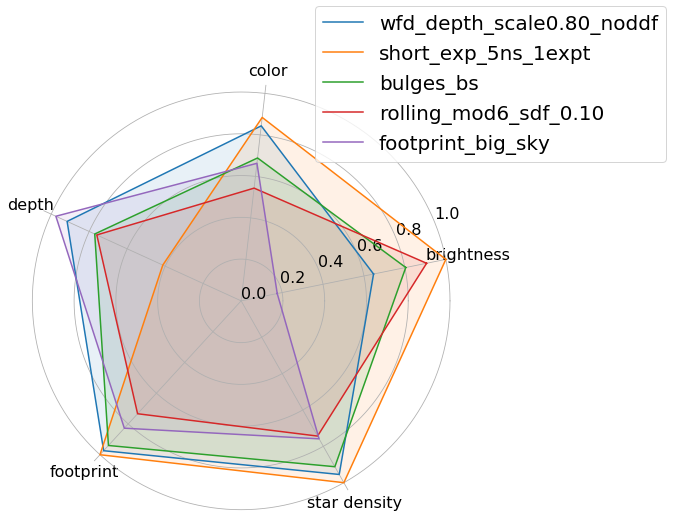

In [175]:
dbnames = [ 'wfd_depth_scale0.80_noddf_v1.5_10yrs',
           'short_exp_5ns_1expt_v1.5_10yrs',
           'bulges_bs_v1.5_10yrs',
           'rolling_mod6_sdf_0.10_v1.5_10yrs',
           
           #'baseline_v1.5_10yrs', 
           'footprint_big_skyv1.5_10yrs']
           #'twilight_neo_mod2_v1.5_10yrs', #'rolling_mod6_sdf_0.20_v1.5_10yrs',
          # 'footprint_newBv1.5_10yrs',
          #'rolling_mod6_sdf_0.10_v1.5_10yrs']
#           'wfd_depth_scale0.99_v1.5_10yrs']

FoMvars = ['FoM_tgapsEvol', 'FoM_tgapsCol', 'FoM_depth', 'FoM_EG', 'FoM_Gal']#, 'FoM_PMT']


fig, ax = plt.subplots(1,1,figsize=(8,8), subplot_kw={'projection': 'polar'} )

for dbname in dbnames:
    r = df_radar[ df_radar.db==dbname ][FoMvars].values.flatten()
    
    label = dbname.replace("_v1.5_10yrs", "").replace("v1.5_10yrs", "")
    print(r)
    ax = plot_radar(r=r, label=label, fill=True, ax=ax)

    FoMvarsnames = ['brightness', 
            "color", 
           "depth", 
            "footprint", 
                    "star density"]#, 'FoM_PMT']
ax.set_xticklabels(FoMvarsnames, );
ax.set_yticks([0, .2, .4, .6, .8, 1])
#ax.set_rlabel_position(0)
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.2))

plt.savefig("figures/radar.pdf", bbox_inches='tight')

### parallel coord plot

In [134]:
family2color = {'agnddf': '#a6cee3',
 'alt': '#1f78b4',
 'baseline': '#b2df8a',
 'bulges': '#33a02c',
 'daily': '#fb9a99',
 'dcr': '#e31a1c',
 'descddf': '#fdbf6f',
 'filterdist': '#ff7f00',
 'footprint': '#cab2d6',
 'goodseeing': '#6a3d9a',
 'greedy': '#ffff99',
 'roll': '#b15928',
 'rolling': '#004301',
 'short': '#5e0022',
 'spiders': '#ed00d7',
 'third': '#00008f',
 'twilight': '#626d60',
 'u60': '#9978ff',
 'var': '#5b3600',
 'wfd': '#00a799'}


In [135]:
def get_family(df):
    """get family of opsim"""
    
    return df['db'].split('_')[0]

In [136]:
df_radar['family'] = df_radar.apply(get_family, axis=1)



In [137]:
df_radar.family.unique()

array(['agnddf', 'alt', 'baseline', 'bulges', 'daily', 'dcr', 'descddf',
       'filterdist', 'footprint', 'goodseeing', 'greedy', 'roll',
       'rolling', 'short', 'spiders', 'third', 'twilight', 'u60', 'var',
       'wfd'], dtype=object)

In [138]:
colorlist = [ family2color[i] for i in df_radar.family.values ]

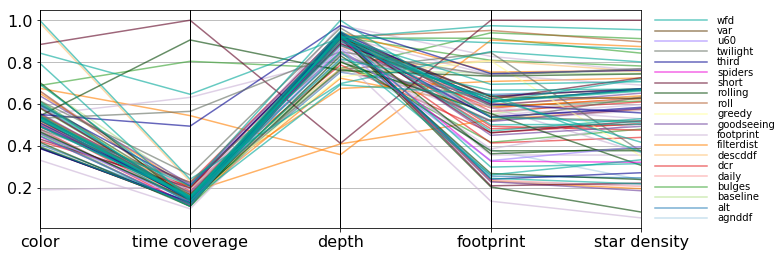

In [162]:
fig = plt.figure(figsize=(12,4))
#pl.rcParams["font.size"] = 20
FoMvars = ['FoM_tgapsCol', 'FoM_tgapsEvol', 'FoM_depth', 'FoM_EG', 'FoM_Gal']#, 'FoM_PMT']

gs = fig.add_gridspec(1, len(FoMvars) * 2)
ax = fig.add_subplot(gs[0, :(len(FoMvars) * 2) - 1])
ax = pd.plotting.parallel_coordinates(
    df_radar, "db", FoMvars, color=colorlist, alpha=0.6)

plt.xticks(range(len(FoMvars)), labels=["color", "time coverage", "depth", "footprint", "star density"],)#,  "shape"],)
#           fontsize=20)
ax.legend().remove()
ax = fig.add_subplot(gs[0, len(FoMvars) * 2 - 1:])
for i,c in enumerate(family2color):
    ax.plot([0, 1], [i,i], color=family2color[c], alpha=0.6)
    ax.text(1.2, i, c, ha="left", va='center')
    ax.axis('off')
    
plt.savefig('figures/opsimParallelCoord.pdf')
#plt.savefig('figures/opsimParallelCoord.png')


In [157]:
df_radar_cum = df_radar[['FoM_tgapsCol', 'FoM_tgapsEvol', 'FoM_depth', 'FoM_EG', 'FoM_Gal']].cumsum(axis=1)
df_radar_cum["family"] = df_radar["family"] 
df_radar_cum["db"] = df_radar["db"]

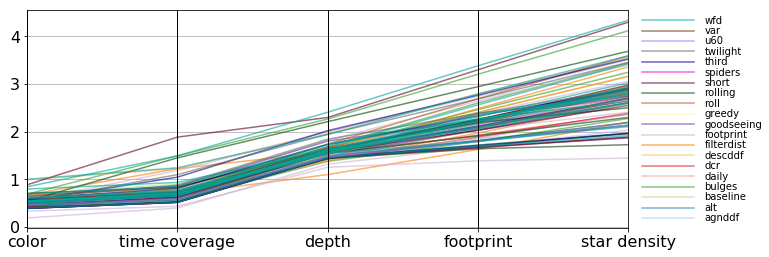

In [160]:
fig = plt.figure(figsize=(12,4))
#pl.rcParams["font.size"] = 20
FoMvars = ['FoM_tgapsCol', 'FoM_tgapsEvol', 'FoM_depth', 'FoM_EG', 'FoM_Gal']#, 'FoM_PMT']

gs = fig.add_gridspec(1, len(FoMvars) * 2)
ax = fig.add_subplot(gs[0, :(len(FoMvars) * 2) - 1])
ax = pd.plotting.parallel_coordinates(
    df_radar_cum, "db", FoMvars, color=colorlist, alpha=0.6)

plt.xticks(range(len(FoMvars)), 
           labels=["color", "time coverage", "depth", "footprint", "star density"],)#,  "shape"],)
#           fontsize=20)
ax.legend().remove()
ax = fig.add_subplot(gs[0, len(FoMvars) * 2 - 1:])
for i,c in enumerate(family2color):
    ax.plot([0, 1], [i,i], color=family2color[c], alpha=0.6)
    ax.text(1.2, i, c, ha="left", va='center')
    ax.axis('off')
    
#plt.savefig('figures/opsimParallelCoord_cum.pdf')
plt.savefig('figures/opsimParallelCoord_cum.png')